In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

#```Model 1```

In [ ]:
# Using One_Hot to tackle Non-numerical Data

In [12]:
insurance_one_hot = pd.get_dummies(insurance)

In [15]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [20]:
X = insurance_one_hot.drop('charges',axis=1)
y = insurance_one_hot['charges']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
len((X_train)),len(y_train) ,len(X_test), len(y_test)

(1070, 1070, 268, 268)

In [37]:
# Setting random seed
tf.random.set_seed(42)

# Creating the Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# Compiling the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(0.01),
                metrics = ['mae'])

# Fitting the model
history = model_1.fit(X_train,y_train,epochs=100,verbose=0)

In [38]:
model_1.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3214.4780 - mae: 3214.4780  


[3158.56787109375, 3158.56787109375]

<Axes: >

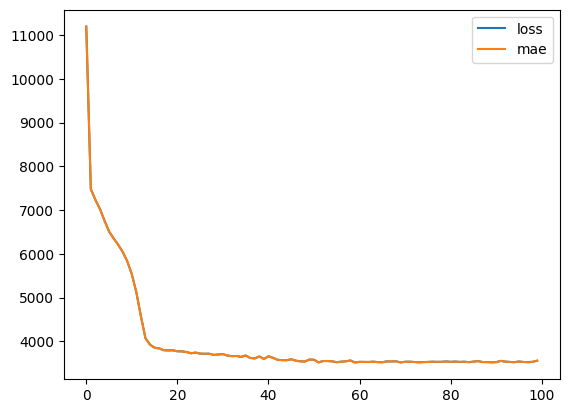

In [39]:
pd.DataFrame(history.history).plot()

#```Model 2```

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']))

# Create X and y
X = insurance.drop('charges',axis=1)
y = insurance['charges']

# Building our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# Fitting the column transformer to our Training data
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [7]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [8]:
# Setting Random Seed
tf.random.set_seed(42)

# Creating the model
Insurance_Model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# Compiling the model
Insurance_Model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# Fitting the model
history = Insurance_Model.fit(X_train_normal,y_train,epochs =200, verbose=0)

In [9]:
Insurance_Model.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3213.8599 - mae: 3213.8599  


[3161.033935546875, 3161.033935546875]

<Axes: >

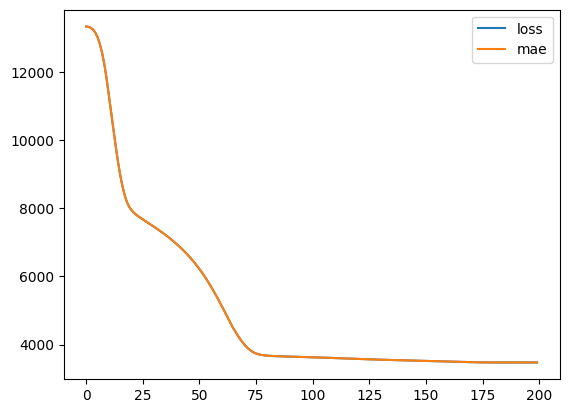

In [10]:
# Plot History
pd.DataFrame(history.history).plot()